In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys

In [2]:
dataX=pd.read_csv(r"C:\Users\admin\.ipynb_checkpoints\logisticX.csv")

In [3]:
dataY=pd.read_csv(r"C:\Users\admin\.ipynb_checkpoints\logisticY.csv")


In [29]:
X=dataX.values
Y=dataY.values
X=(X-X.mean())/X.std()


In [30]:
dist1=X[:49,:]

In [31]:
dist2=X[49:,:]

In [159]:
def hypothesis(x,theta,bias):
    a=np.dot(x,theta.T)
    return sigmoid(a+bias)

In [160]:
def sigmoid(z):
    return (1.0/(1.0+np.exp(-1*z)))
def error(x,y,bias,theta):
    m=x.shape[0]
    e=0
    for i in range(m):
        hx=hypothesis(x[i],theta,bias)
        e+=y[i]*np.log2(abs(hx))+(1-y[i])*np.log2(abs(1-hx))
    return -e/m

In [161]:
def gradient(x,y,bias,theta):
    grad_theta=np.zeros(theta.shape)
    grad_b=0.0
    m=x.shape[0]
    for i in range(m):
        hx=hypothesis(x[i],theta,bias)
        grad_theta+=(y[i]-hx)*x[i]
        grad_b+=(y[i]-hx)
    grad_theta/=m
    grad_b/=m
    return [grad_theta,grad_b]

In [439]:
def graddescent(x,y,bias,theta,learningrate=0.001):
    err=error(x,y,bias,theta)
    [thetas,bias]=gradient(x,y,bias,theta)
    theta=theta+learningrate*thetas
    bias=bias+learningrate*bias
    return err,theta,bias
def errorfunc(x,theta,bias,y):
    err=0
    hx=hypothesis(x,theta,bias)
    err=y*np.log2(abs(hx))+(1-y)*np.log2(abs(1-hx))
    return -err
def stochgrad(x,theta,bias,y):
    grad_thetas=np.zeros(theta.shape)
    grad_bias=0.0
    hx=hypothesis(x,theta,bias)
    grad_thetas+=(y-hx)*x
    grad_bias+=y-hx
    return grad_thetas,grad_bias
def stochasticgrad(x,y,bias,theta,learningrate=0.001,batchsize=1):
    grad_w=np.zeros(theta.shape)
    a=grad_w
    grad_b=0.0
    m=x.shape[0]
    costlist=[]
    b=0.0
    for j in range(400):
        indices=np.arange(m)
        np.random.shuffle(indices)
        array=indices[:batchsize]
        cost=0.0
        for i in array:
            cost+=errorfunc(x[i],theta,bias,y[i])
            grad_w,grad_b=stochgrad(x[i],theta,bias,y[i])
            a+=grad_w
            b+=grad_b
        costlist.append(cost/batchsize)
        a/=batchsize
        b/=batchsize
        theta=theta+learningrate*a
        bias=bias+learningrate*a
    return costlist,theta,bias
            


In [440]:
finaltheta=5*np.random.random((X.shape[1]))
def pred(x,theta,bias):
    a=hypothesis(x,theta,bias)
    if(a<0.5):
        return 0
    else:
        return 1
def accuracy(x,y,theta,bias):
    ypredic=np.zeros(x.shape[0])
    m=x.shape[0]
    totalprediction=0
    for i in range(m):
        p=pred(x[i],theta,bias)
        ypredic[i]+=p
        if(ypredic[i]==y[i]):
            totalprediction+=1
    totalprediction/=m
    return totalprediction

In [441]:
errorlist=[]
accuracylist=[]
finalbias=2*np.random.random()
maxitr=200
for i in range(maxitr):
    e,finaltheta,finalbias=graddescent(X,Y,finalbias,finaltheta,0.2)
    errorlist.append(e)
    accuracylist.append(accuracy(X,Y,finaltheta,finalbias))    

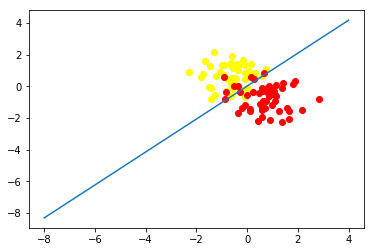

In [442]:

x=np.linspace(-8,4,2)
y=-(finaltheta[0]*x+finalbias)/finaltheta[1]
plt.plot(x,y)
plt.scatter(dist1[:,0],dist1[:,1],c='yellow')
plt.scatter(dist2[:,0],dist2[:,1],c='red')



0.8888888888888888


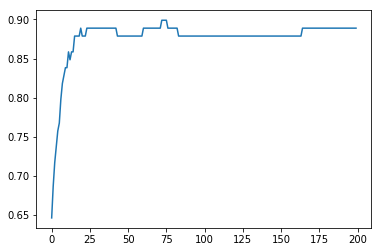

In [443]:

plt.plot(accuracylist)
print(accuracylist[-1])

In [445]:
theta=np.zeros(X.shape[1])
bias=0.0
error,theta,bias=stochasticgrad(x,y,bias,theta,learningrate=0.01,batchsize=5)


IndexError: list assignment index out of range

In [ ]:
e=np.array(e)